In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def even(x):
    alleven = True
    mistakeloc = []
    for i in range(0, len(x)):
        if x[i] % 2 != 0:
            alleven = False
            mistakeloc.append(x[i])
    if alleven == False:
        return alleven, mistakeloc
    else:
        return alleven, 'No issues'

def odd(x):
    allodd = True
    mistakeloc = []
    for i in range(0, len(x)):
        if x[i] % 2 != 1:
            allodd = False
            mistakeloc.append(x[i])
    if allodd == False:
        print(mistakeloc)
        return allodd, mistakeloc
    else:
        return allodd, 'No issues'

In [26]:
def graphdata(folder):
    
    #initialize df
    overall = pd.DataFrame()
    subid = []; condition = []; DR = []; unmovedobj = []; movedobj = []; totalobjexp = [];
    
    #pull files from folder
    directory = folder
    sheets = []
    for filename in os.scandir(directory):
        if filename.is_file():
            sheets.append(filename.path)

    basesheets = [s for s in sheets if 'base' in s]
    basesheets.sort()
    testsheets = [s for s in sheets if 'test' in s]
    testsheets.sort()

    #check for correct numbers of files
    if len(basesheets) != len(testsheets):
        print('Error: Unequal number of base and test files')
    
    for i in range(0, len(basesheets)):
        #make data easier to read
        base = pd.read_csv(basesheets[i])
        base = base.dropna()
        base = base.reset_index()
        test = pd.read_csv(testsheets[i])
        test = test.dropna()
        test = test.reset_index()
        
        #check for data entry mistakes in baseline files
        base_starts = np.where(base.action.str.contains('start'))[0]
        test_starts = np.where(test.action.str.contains('start'))[0]
        base_stops = np.where(base.action.str.contains('stop'))[0]
        test_stops = np.where(test.action.str.contains('stop'))[0]

        if even(base_starts)[0] == False:
            print('File: ', basesheets[i], '. Error(s) at ', even(base_starts)[1])
        if even(test_starts)[0] == False:
            print('File: ', testsheets[i], '. Error(s) at ', even(test_starts)[1])

        if odd(base_stops)[0] == False:
            print('File: ', basesheets[i], '. Error(s) at ', odd(base_stops)[1])
        if odd(test_stops)[0] == False:
            print('File: ', testsheets[i], '. Error(s) at ', odd(test_stops)[1])

        if len(base_starts) != len(base_stops):
            print('Error: unequal number of starts and stop in ', basesheets[i])
        if len(test_starts) != len(test_stops):
            print('Error: unequal number of starts and stop in ', testsheets[i])

        t1 = 0; t2 = 0; t3 = 0; t4 = 0

        for j in range(0, len(base)):
            if base.action[j] == 'object1_start':
                t1 = t1 + (base.frame[j+1] - base.frame[j])/60
            elif base.action[j] == 'object2_start':
                t2 = t2 + (base.frame[j+1] - base.frame[j])/60
        for j in range(0, len(test)):
            if test.action[j] == 'object1_start':
                t3 = t3 + (test.frame[j+1] - test.frame[j])/60
            elif test.action[j] == 'object2_start':
                t4 = t4 + (test.frame[j+1] - test.frame[j])/60

        DRbase = (t2 - t1)/(t2 + t1)
        DRtest = (t4 - t3)/(t4 + t3)

        subid.append(basesheets[i][16:18]); subid.append(basesheets[i][16:18])
        condition.append('base'); condition.append('test')
        DR.append(DRbase); DR.append(DRtest)
        unmovedobj.append(t1)
        unmovedobj.append(t3)
        movedobj.append(t2)
        movedobj.append(t4)
        totalobjexp.append(t1+t2)
        totalobjexp.append(t3+t4)
    overall['subid'] = subid
    overall['condition'] = condition
    overall['DR'] = DR
    overall['Unmoved Obj'] = unmovedobj
    overall['Moved Obj'] = movedobj
    overall['Total Obj Exp'] = totalobjexp
    plt.figure(0)
    sns.set_style("darkgrid")
    ax = sns.scatterplot(x = "condition", y = "DR", hue = "subid", data = overall).set(title = 'Object Location DR Comparison', ylim=(-1,1))
    ax1 = sns.lineplot(x = "condition", y = "DR", hue = "subid", legend = False, data = overall)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.figure(1)
    sns.set_style("darkgrid")
    ax2 = sns.scatterplot(x = ['Unmoved Obj', 'Moved Obj'], y = "Unmoved Obj", hue = "subid", data = overall).set(title = 'Object Location DR Comparison', ylim=(-1,1))
    ax3 = sns.lineplot(x = "condition", y = "DR", hue = "subid", legend = False, data = overall)


In [6]:
import dabest

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 24 and the vector passed to `x` has length 2.

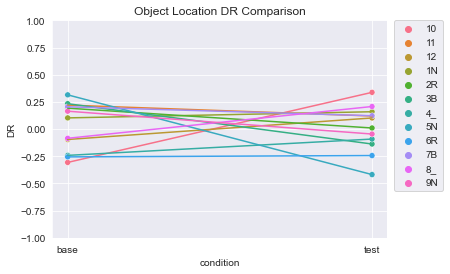

<Figure size 432x288 with 0 Axes>

In [27]:
folder = 'cohort1_scoring'
graphdata(folder)